In [350]:
from pywaffle import Waffle # PyWaffle Documentation --> https://buildmedia.readthedocs.org/media/pdf/pywaffle/latest/pywaffle.pdf
import matplotlib.pyplot as plt #Matplotlib pyplot to plot the charts
import pandas as pd
import matplotlib as mpl
from highlight_text import htext #used for highlighting the title

In [351]:
#Import the data into a dataframe
data = pd.read_csv('laligapassing2019.csv')

#Make a copy of the dataframe only with the rows I want
data2 = data[['Player','Left','Right','Head','Other']].copy()

#Create a total to sort the data
data2['Total'] = data2[['Left','Right','Head','Other']].sum(axis=1)
data2 = data2.sort_values(by=['Total'],ascending=False)

#Select only the top 9 rows in this case players
data2 = data2[:9]

#Edit the player names so they look nice. This is only for FBREF data
data2['Player'] = data['Player'].str.split('\\', expand=True)[0]

#Transpose the dataframe and set the top row which will be the player names to be the column names.
#We then drop the Player and Total Rows to get the data ready for ploting
data2 = data2.T
data2.columns = data2.iloc[0]
data2 = data2.drop('Player')
data2 = data2.drop('Total')

#Divide the data by 50 so it doesn't plot too many boxes
data2 = data2/50

#Create a new dataframe so that it is in the proper set up 
my_list = data2.columns.values.tolist()
data3 = pd.DataFrame(data2,columns=my_list)

In [352]:
data3

,Gerard Piqué,Sergio Busquets,Toni Kroos,Daniel Parejo,Éver Banega,Jesús Navas,Sergio Canales,Casemiro,Lionel Messi
Left,2.26,7.9,8.14,4.64,4.24,3.5,38.7,3.84,38.38
Right,47.28,41.64,41.24,41.6,41.84,39.66,4.4,35.9,3.48
Head,1.98,1.38,0.46,1.14,0.84,1.9,0.72,2.3,0.4
Other,0.26,0.16,0.1,0.26,0.1,0.1,0.18,0.4,0.16


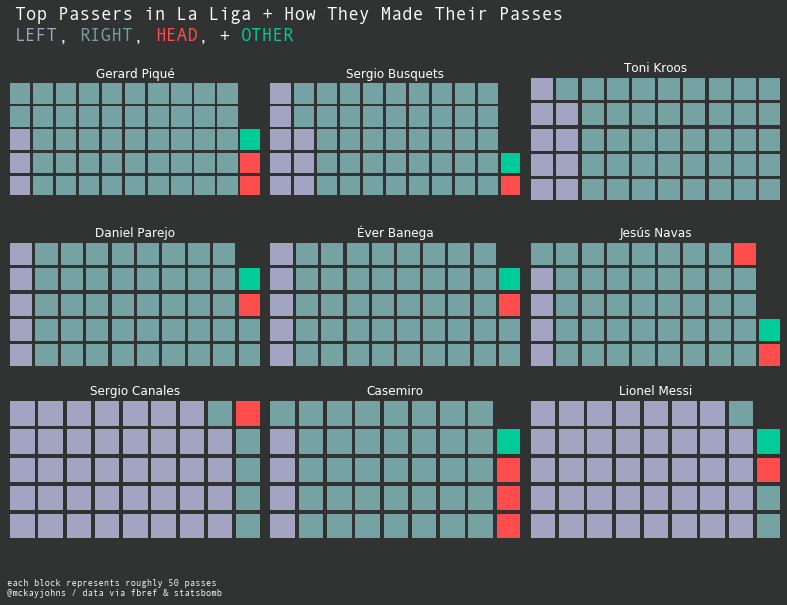

In [381]:
#Create the waffle chart. We use pyplot.figure() witht the figure class = Waffle
#Refer to the documentation to get exact explanation on everything.
fig = plt.figure(
    FigureClass = Waffle,
    plots={
        '331': {                              #refer matplotlib subplot grids, '331' means 3 x 3 grid, first subplot
            'values': data3.iloc[:,0],
            'title': {
                'label': my_list[0],
                'color': 'white'
            },
            },
        '332': {                             
            'values': data3.iloc[:,1],
            'title': {
                'label': my_list[1],
                'color': 'white'
            },
            },
        '333': {                           #Line 20   
            'values': data3.iloc[:,2],
            'title': {
                'label': my_list[2],
                'color': 'white'
            }
            },
        '334':{                              
            'values': data3.iloc[:,3],
            'title': {
                'label': my_list[3],
                'color': 'white'
            },
            }
        ,
        '335': {                              
            'values': data3.iloc[:,4],
            'title': {
                'label': my_list[4],
                'color': 'white'
            },
            },
        '336': {
            'values': data3.iloc[:,5],                              
            'title': {
                'label': my_list[5],
                'color': 'white'
            },
            },
        '337': {                              
            'values': data3.iloc[:,6],
            'title': {
                'label': my_list[6],
                'color': 'white'
            },
            },
        '338': {                             
            'values': data3.iloc[:,7],
            'title': {
                'label': my_list[7],
                'color': 'white'
                ''
            },
            },
        '339': {
            'values': data3.iloc[:,8],
            'title': {
                'label': my_list[8],
                'color': 'white'
            },
            },
    },
    rows=5,
    figsize=(11, 9),
    rounding_rule='floor',
    colors=("#a3a3c2", "#75a3a3", "#ff4d4d",'#00cc99'),
    facecolor=background
)

#Different colors so we don't have to type them in every time
background = "#313332"
text_color = 'w'
primary = 'red'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


#Create the text and highlight the different points
s = "Top Passers in La Liga + How They Made Their Passes \n<LEFT>, <RIGHT>, <HEAD>, + <OTHER>"
htext.fig_htext(s,
                x=.02,y=.9,
                fontfamily='Andale Mono',
                highlight_weights=['bold'],
                string_weight='bold',
                fontsize=18,
                color=text_color,
                highlight_colors=['#a3a3c2','#75a3a3','#ff4d4d','#00cc99'])
fig.patch.set_facecolor(background)
fig.text(.01,0.05,"each block represents roughly 50 passes\n@mckayjohns / data via fbref & statsbomb",fontstyle='italic',fontsize=9,fontfamily='Andale Mono',color=text_color)


plt.savefig('waffle.png',dpi=300,bbox_inches = 'tight',facecolor=background)